1.READ DATA

In [44]:
import pandas as pd                #importing required packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,r2_score,precision_score,recall_score,f1_score



In [45]:
                     
df = pd.read_csv("churn_modelling.csv",header=0)   #read data
df.head()                                        #display first 5rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [47]:
df.shape      

(10000, 14)

In [48]:
df.shape

(10000, 14)

In [49]:
df.size

140000

In [50]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [51]:
df.info()        #to get information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [52]:
df.isnull().values.any()  #checking null values

np.False_

In [53]:
df.columns    #to get data description

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [54]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [55]:
print(df["Geography"].unique())    #print all unique values in geography
print(df["Gender"].unique())       #print all unique values in gender
print(df["NumOfProducts"].unique())  #print all unique values in numofproducts
print(df["HasCrCard"].unique())     #print all unique values in hascrcard
print(df["IsActiveMember"].unique())  #print all unique values in isactivemember
print(df["Exited"].unique())          #print all unique values in exited


['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]
[1 0]


In [56]:
df.isnull().sum()   #checking for null values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [57]:
df.axes  #it return list containing  columns

[RangeIndex(start=0, stop=10000, step=1),
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object')]

In [58]:
df.iloc[0:4]    #select and return first 4 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [59]:
df.loc[:, "CustomerId"]   #select all rows and only customer column

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

2.DATA VISUALIZATION

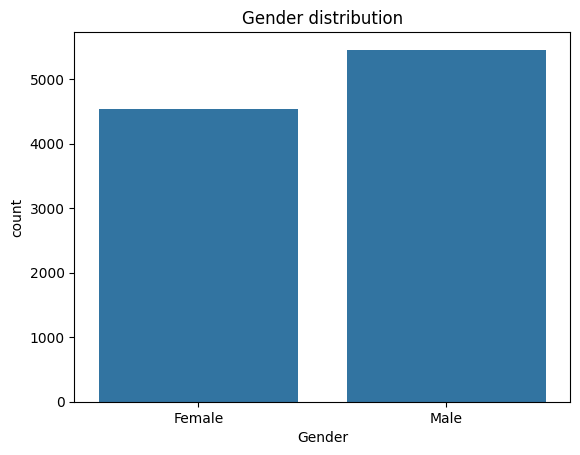

In [60]:
sns.countplot(x='Gender' , data=df)  # Create a count plot for the 'Gender' column
plt.title('Gender distribution')   #add title
plt.show()

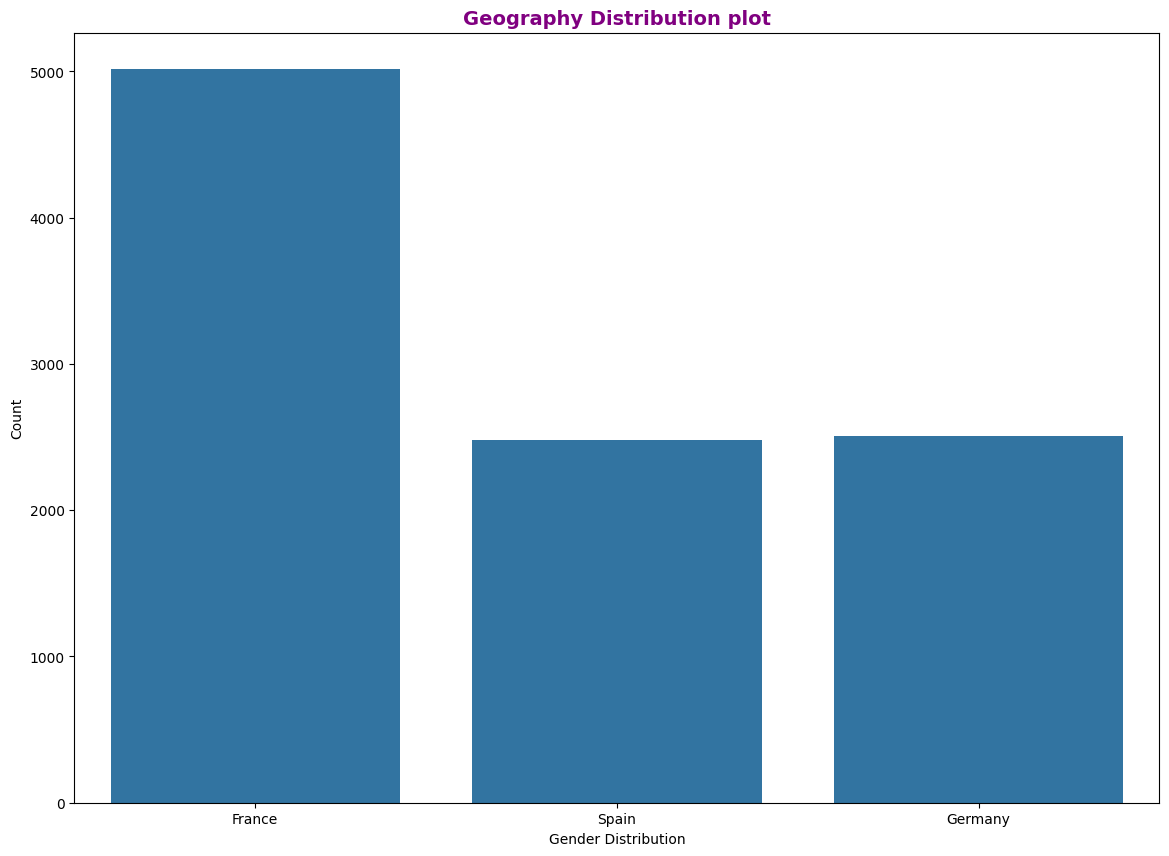

In [61]:
plt.figure(figsize=(14,10))              # Set the figure size to make the plot larger and more readable
sns.countplot(x='Geography',data=df)   # Create a count plot for the 'Geography' column
plt.xlabel('Gender Distribution')      # Label for x-axis
plt.ylabel('Count')                    # Label for y-axis
plt.title('Geography Distribution plot',fontsize=14,fontweight="bold",color="purple")   # Add a title with custom font size, weight, and color
plt.show()   #display plot
           

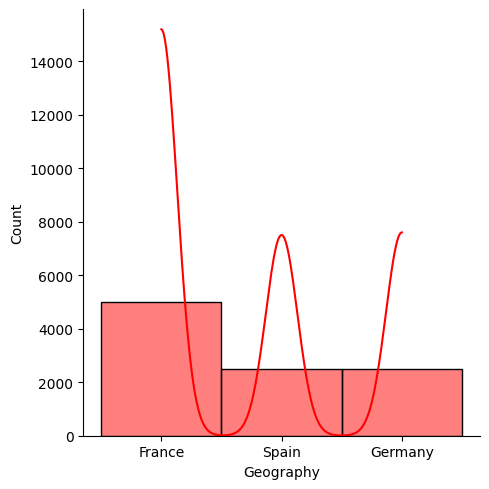

In [62]:
sns.displot(df.Geography, kde=True,color="red")  # Create a distribution plot for the 'Geography' column

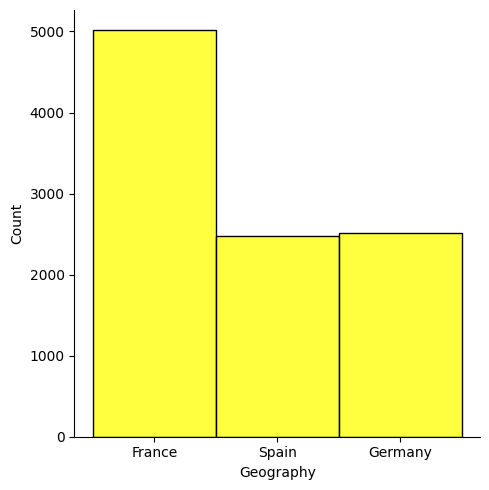

In [63]:
sns.displot(df.Geography,color="yellow")  # Attempting to create a distribution plot for 'Geography' column

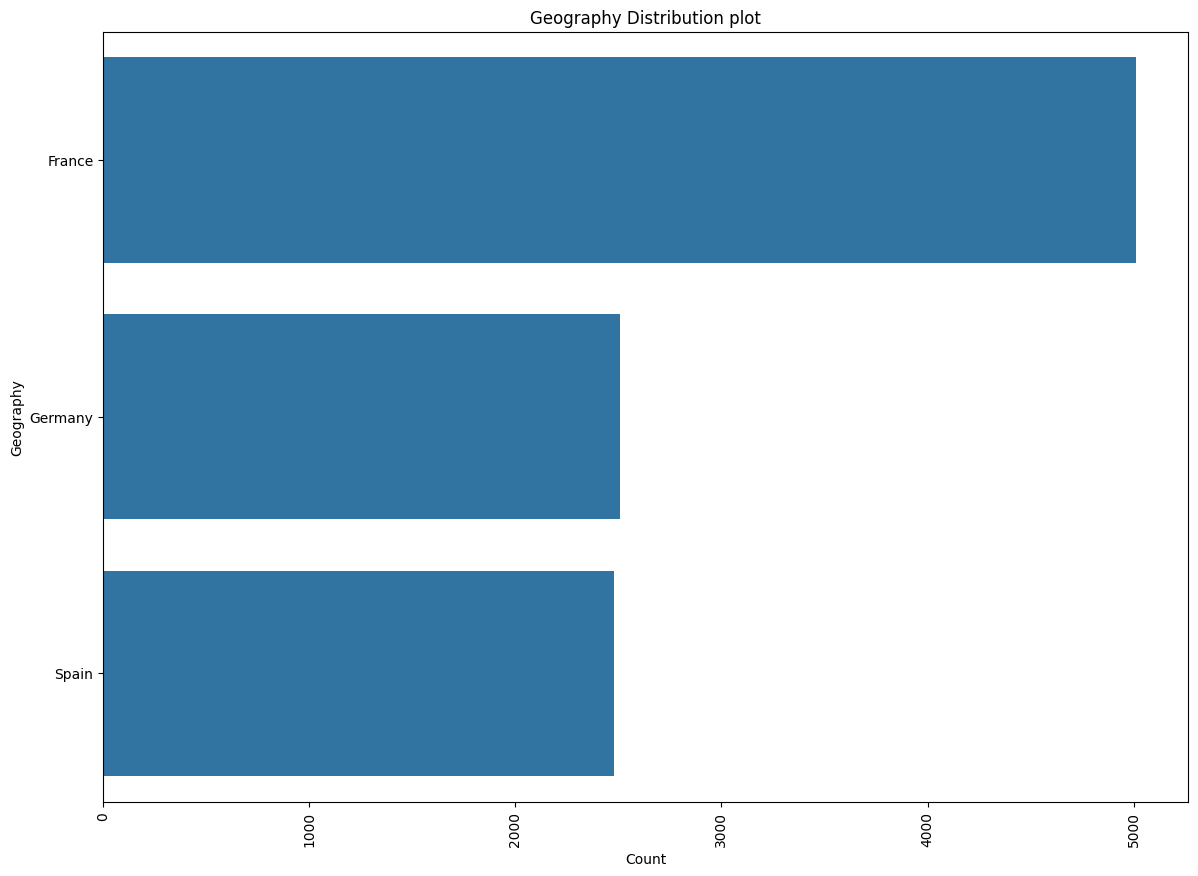

In [64]:
plt.figure(figsize=(14,10))           # Set the figure size for better readability
count1 = df.Geography.value_counts()      # Get the counts of each category in the 'Geography' column
sns.barplot(x=count1,y=count1.index,orient='h')   # Create a horizontal bar plot
plt.xlabel('Count')                               # Label for x-axis
plt.ylabel('Geography')                              # Label for y-axis
plt.title('Geography Distribution plot')             # Add a title to the plot
plt.xticks(rotation=90)                             # Rotate x-axis ticks for better readability 
plt.show()
           

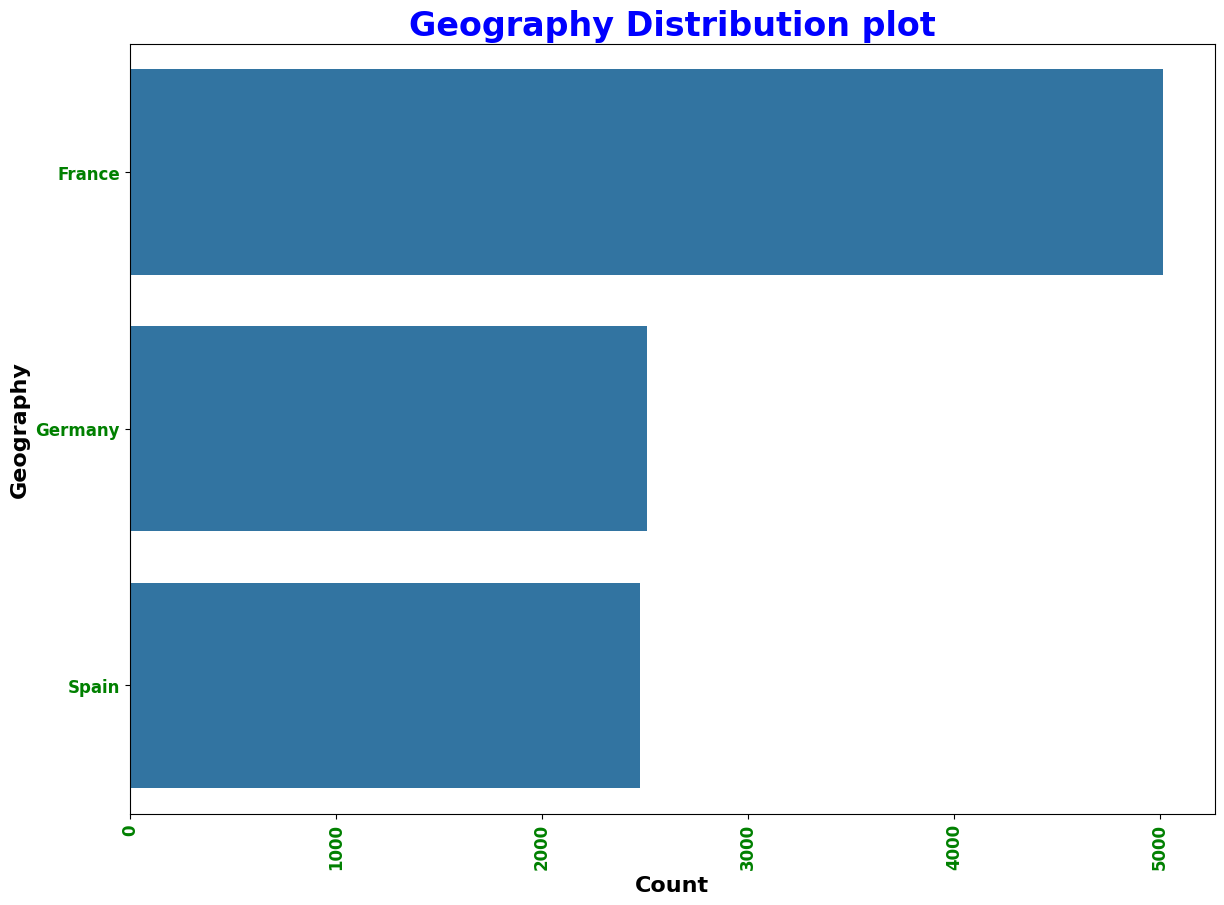

In [65]:
plt.figure(figsize=(14,10))                               # Set the figure size for better readability
count1 = df.Geography.value_counts()                       # Count the occurrences of each category in the 'Geography' column
sns.barplot(x=count1,y=count1.index,orient='h')            # Create a horizontal bar plot
plt.xlabel('Count',fontsize=16,fontweight='bold')          # Set x-axis label with font size and bold weight
plt.ylabel('Geography',fontsize=16,fontweight="bold")      # Set y-axis label with font size and bold weight
plt.title('Geography Distribution plot',fontsize=24,fontweight='bold',color='blue')   # Add a title with large font size, bold weight, and blue color
plt.xticks(rotation=90,fontsize=12,fontweight='bold',color='green')  # Customize x-axis ticks: rotate 90 degrees, font size, bold weight, and color
plt.yticks(fontsize=12,fontweight='bold',color='green')    # Customize y-axis ticks: font size, bold weight, and color
plt.show()

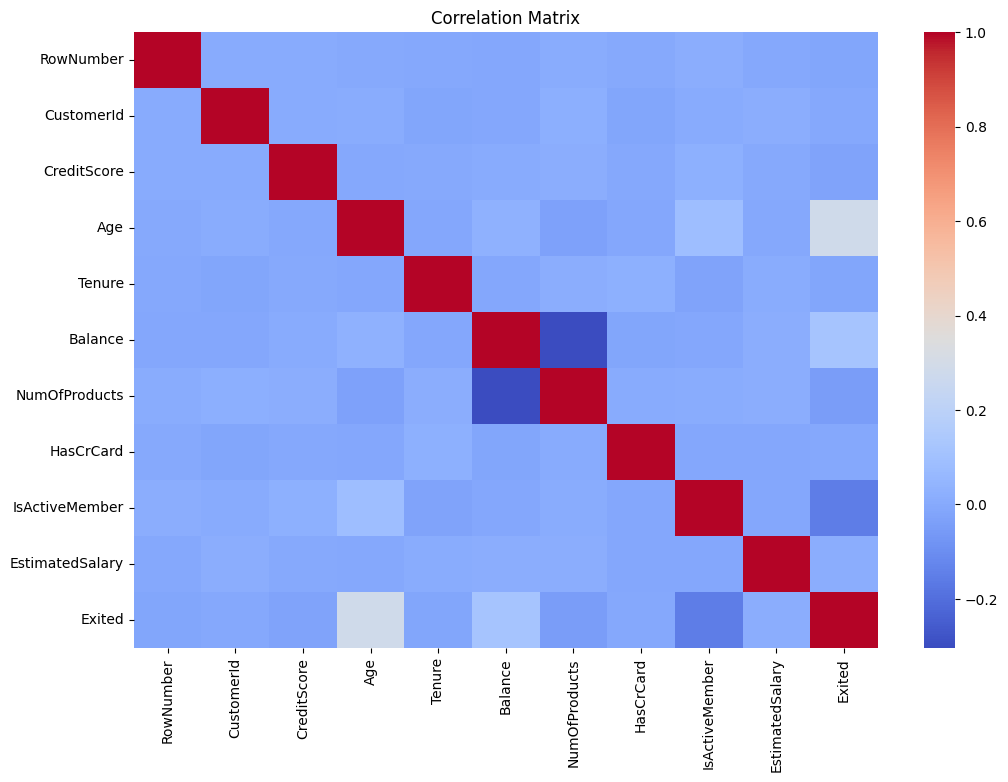

In [66]:

numerical_df = df.select_dtypes(include=['float64', 'int64'])   # Select only numerical columns (float64 and int64) from the DataFrame
correlation_matrix = numerical_df.corr()                          # Compute the correlation matrix for numerical columns
plt.figure(figsize = (12,8))                                    # Set the figure size for better readability

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")   # Create a heatmap of the correlation matrix
plt.title("Correlation Matrix")                                         # Add a title to the plot
plt.show()

3.DATA PREPROCESSING 

In [67]:
df.head()   # Display the first 5 rows of the DataFrame by default

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
df.drop(labels = ["RowNumber","CustomerId", "Surname"], axis = 1,inplace=True)    # Drop unnecessary columns from the DataFrame

In [69]:
df = pd.get_dummies(df, drop_first = True)     # Convert categorical variables into numerical dummy

In [70]:
df = df.replace({True: 1, False: 0})

C:\Users\srika\AppData\Local\Temp\ipykernel_21232\3074727906.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


In [71]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [72]:
x = df.drop("Exited", axis=1)  # x contains all the feature columns except the target column 'Exited'
y = df["Exited"]               # y contains only the target column 'Exited'

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 42)   # Split the dataset into training and testing sets

In [74]:
scaler = StandardScaler()                   # Initialize the StandardScaler
x_train = scaler.fit_transform(x_train)     # Fit the scaler on the training data and transform it
x_test = scaler.fit_transform(x_test)       # Transform the test data using the SAME scaler fitted on training data


4.TRAIN LOGISTIC REGRESSION MODEL

In [75]:
lr_model = LogisticRegression()           # Initialize the Logistic Regression model

In [76]:
lr_model.fit(x_train,y_train)             # Train the Logistic Regression model using the training data

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [77]:
lr_predictions = lr_model.predict(x_test)   # Use the trained Logistic Regression model to make predictions on the test set

In [78]:

print("Logistic Regression Model")                        # Print header
print(confusion_matrix(y_test, lr_predictions))           # Confusion Matrix: shows True Positives, True Negatives, False Positives, and False Negatives
print(classification_report(y_test, lr_predictions))       # Classification Report: includes Precision, Recall, F1-Score, and Support for each class
print("Accuracy:", accuracy_score(y_test, lr_predictions))   # Accuracy: overall proportion of correct predictions
print("Precision Score:", precision_score(y_test, lr_predictions))  # Precision: proportion of positive predictions that are actually positive
print("Recall Score:", recall_score(y_test, lr_predictions))  # Recall: proportion of actual positives correctly identified
print("f1 Score:", f1_score(y_test, lr_predictions))       # F1 Score: harmonic mean of precision and recall, balances both metrics

Logistic Regression Model
[[1541   66]
 [ 313   80]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy: 0.8105
Precision Score: 0.547945205479452
Recall Score: 0.2035623409669211
f1 Score: 0.29684601113172543


5.TRAIN RANDOM FOREST MODEL

In [79]:
rf_model = RandomForestClassifier(n_estimators=1000,n_jobs = -1,random_state=42)   # Initialize the Random Forest model

In [80]:
rf_model.fit(x_train,y_train)    # Train the Random Forest model using the training data

,n_estimators,1000
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [81]:
rf_predictions = rf_model.predict(x_test)   # Use the trained Random Forest model to make predictions on the test set

In [82]:
print("Random Forest Model")                            #print header
print(confusion_matrix(y_test, lr_predictions))         # Confusion Matrix: shows True Positives, True Negatives, False Positives, and False Negatives
print(classification_report(y_test, lr_predictions))     # Classification Report: includes Precision, Recall, F1-Score, and Support for each class
print("Accuracy:", accuracy_score(y_test, lr_predictions))   # Accuracy: overall proportion of correct predictions
print("Precision Score:", precision_score(y_test, lr_predictions))  # Precision: proportion of positive predictions that are actually positive
print("Recall Score:", recall_score(y_test, lr_predictions))    # Recall: proportion of actual positives correctly identified
print("f1 Score:", f1_score(y_test, lr_predictions))          # F1 Score: harmonic mean of precision and recall, balances both metrics

Random Forest Model
[[1541   66]
 [ 313   80]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy: 0.8105
Precision Score: 0.547945205479452
Recall Score: 0.2035623409669211
f1 Score: 0.29684601113172543


6.TRAIN GRADIENT BOOSTING MODEL

In [83]:
gb_model = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.02,max_depth=1,random_state=42)   # Initialize the Gradient Boosting model

In [84]:
gb_model.fit(x_train,y_train)    # Train the Gradient Boosting model using the training data

,loss,'log_loss'
,learning_rate,0.02
,n_estimators,1000
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,1
,min_impurity_decrease,0.0
,init,None


In [85]:
gb_predictions = gb_model.predict(x_test)    # Use the trained Gradient Boosting model to make predictions on the test set

In [86]:
print("Gradient Boosting Model")                        # Print model name for clarity in output
print(confusion_matrix(y_test, lr_predictions))         # Confusion matrix to check correct vs incorrect predictions
print(classification_report(y_test, lr_predictions))    # Detailed classification report: precision, recall, f1-score for each class
print("Accuracy:", accuracy_score(y_test, lr_predictions))  #Accuracy: Overall correctness of the model
print("Precision Score:", precision_score(y_test, lr_predictions))  #Precision: Out of predicted positives, how many were actually positive
print("Recall Score:", recall_score(y_test, lr_predictions))    #  Recall: Out of actual positives, how many were correctly predicted
print("f1 Score:", f1_score(y_test, lr_predictions))    #  F1 Score: Harmonic mean of precision and recall (balances both metrics)

Gradient Boosting Model
[[1541   66]
 [ 313   80]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy: 0.8105
Precision Score: 0.547945205479452
Recall Score: 0.2035623409669211
f1 Score: 0.29684601113172543
